# Deep Learning - Lab 08

## Group 24

* Sebastian Häni <haeniseb@students.zhaw.ch>
* Raffael Affolter <affolraf@students.zhaw.ch>
* Benjamin Mäder <maedeben@students.zhaw.ch>


# Loading the packages

In [1]:
# First, import TF and get its version.
import tensorflow as tf
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print(
        'WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'
        .format(tf_version) + '.\033[0m')
else:
    print('OK: TensorFlow >= 2.0.0' + '.\033[0m')

print("Num GPUs Available: ",
      len(tf.config.experimental.list_physical_devices('GPU')))

OK: TensorFlow >= 2.0.0.
Num GPUs Available:  0


In [51]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras import utils
from keras.datasets import mnist
from keras import regularizers

%matplotlib inline

# Loading the raw data

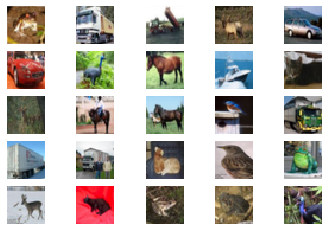

(50000, 32, 32, 3)


In [17]:
def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0, 5):
        for j in range(0, 5):
            plt.subplot2grid((5, 5), (i, j))
            plt.imshow(X[k])
            k = k + 1
            plt.axis('off')
    plt.show()



# Load data & split data between train and test sets
(X_train_orig, y_train), (X_test_orig, y_test) = tf.keras.datasets.cifar10.load_data()

show_imgs(X_train_orig)

print(X_train_orig.shape)

In [18]:
X_train = X_train_orig.reshape(50000, 3072)
X_test = X_test_orig.reshape(10000, 3072)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train = X_train / 255.0
X_test = X_test / 255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

50000 train samples
10000 test samples


5 epochs, batch size =
128, L2 regularizer (value of 0.05), softmax activation, categorical-crossentropy loss and
adam optimizer. Report on the performance on the test set.

In [5]:
n_classes = 10
Y_train = utils.to_categorical(y_train, n_classes) # modify targets to 1-hot using utils.to_categorical()
Y_test = utils.to_categorical(y_test, n_classes)
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


# One-layer network and weight visualisation

In [6]:
E = 5  # number of epochs
B = 128  # batch size
D = X_train.shape[1]  # dimension of input sample - 1024 for MNIST
L2 = 0.05
n_classes = 10

model = Sequential()
model.add(
    Dense(n_classes,
          input_shape=(D, ),
          activation="softmax",
          kernel_regularizer=regularizers.l2(L2)))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
log = model.fit(X_train,
                Y_train,
                batch_size=B,
                epochs=E,
                verbose=1,
                validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 2s 35us/sample - loss: 2.2961 - accuracy: 0.3066 - val_loss: 2.0004 - val_accuracy: 0.3341
Epoch 2/5
50000/50000 [==============================] - 1s 24us/sample - loss: 1.9986 - accuracy: 0.3272 - val_loss: 2.0241 - val_accuracy: 0.3067
Epoch 3/5
50000/50000 [==============================] - 1s 24us/sample - loss: 1.9838 - accuracy: 0.3325 - val_loss: 2.0072 - val_accuracy: 0.3021
Epoch 4/5
50000/50000 [==============================] - 1s 24us/sample - loss: 1.9899 - accuracy: 0.3277 - val_loss: 1.9911 - val_accuracy: 0.3206
Epoch 5/5
50000/50000 [==============================] - 1s 24us/sample - loss: 1.9809 - accuracy: 0.3340 - val_loss: 2.0044 - val_accuracy: 0.3308


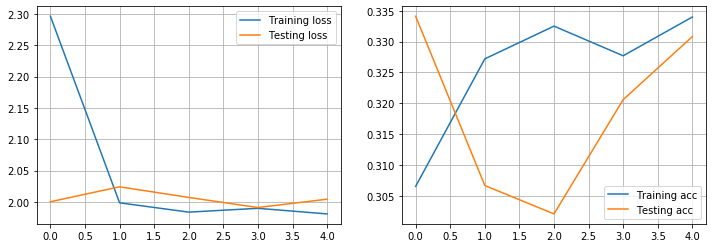

In [9]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

## Validation Accuracy max: 

* With regularization: 0.3535
* Without regularization: 0.3822

(3072, 10)
(10,)


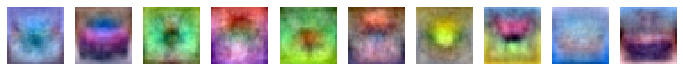

In [21]:
weights = model.get_weights()
for w in weights:
    print(w.shape)

w1 = weights[0]
f = plt.figure(figsize=(12, 12))

for i in range(10):
    ax = f.add_subplot(1, 10, 1 + i)
    im = w1[:, i]  # get the weights landing to neuron i
    im = im.reshape(32, 32, 3) 
    # now put back the pixel values to 0-256 doing a min-max norm and multiplying by 256
    min = im.min()  # get the min of im
    max = im.max()  # get the max of im
    im = (im - min) / (max - min) * 255  # perform a min-max norm
    im = im.round().astype('int')  # round and convert to int
    ax.axis('off')
    ax.imshow(im)

# Two-layer network

In [24]:
from keras import regularizers
E = 30  # number of epochs
B = 128  # batch size
D = X_train.shape[1]  # dimension of input sample - 3024 for MNIST
L2 = 0.05
n_classes = 10

model = Sequential()
model.add(Dense(128, input_shape=X_train[0].shape, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
log = model.fit(X_train,
                Y_train,
                batch_size=B,
                epochs=E,
                verbose=1,
                validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 3s 54us/sample - loss: 1.8932 - accuracy: 0.3279 - val_loss: 1.7570 - val_accuracy: 0.3797
Epoch 2/30
50000/50000 [==============================] - 2s 46us/sample - loss: 1.7207 - accuracy: 0.3952 - val_loss: 1.6766 - val_accuracy: 0.4138
Epoch 3/30
50000/50000 [==============================] - 2s 46us/sample - loss: 1.6560 - accuracy: 0.4163 - val_loss: 1.6539 - val_accuracy: 0.4070
Epoch 4/30
50000/50000 [==============================] - 2s 46us/sample - loss: 1.6083 - accuracy: 0.4361 - val_loss: 1.6457 - val_accuracy: 0.4183
Epoch 5/30
50000/50000 [==============================] - 2s 46us/sample - loss: 1.5683 - accuracy: 0.4489 - val_loss: 1.5884 - val_accuracy: 0.4374
Epoch 6/30
50000/50000 [==============================] - 2s 46us/sample - loss: 1.5401 - accuracy: 0.4583 - val_loss: 1.5948 - val_accuracy: 0.4316
Epoch 7/30
50000/50000 [==============================] 

### Best Achieved performance: ~50% test accuracy

# Convolutional Networks

In [30]:
model = Sequential()
model.add(
    Conv2D(32, (3, 3),
           padding='same',
           strides=(1, 1),
           input_shape=(32, 32, 3),
           activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                81930     
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


In [32]:
X_train1 = X_train.reshape(50000, 32, 32, 3)
X_test1 = X_test.reshape(10000, 32, 32, 3)
E = 10
B = 256

In [33]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

log = model.fit(X_train1,
                Y_train,
                batch_size=B,
                epochs=E,
                verbose=1,
                validation_data=(X_test1, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 16s 325us/sample - loss: 1.6680 - accuracy: 0.4168 - val_loss: 1.4541 - val_accuracy: 0.5002
Epoch 2/10
50000/50000 [==============================] - 16s 315us/sample - loss: 1.3662 - accuracy: 0.5248 - val_loss: 1.3379 - val_accuracy: 0.5395
Epoch 3/10
50000/50000 [==============================] - 16s 319us/sample - loss: 1.2777 - accuracy: 0.5568 - val_loss: 1.2642 - val_accuracy: 0.5565
Epoch 4/10
50000/50000 [==============================] - 16s 317us/sample - loss: 1.2184 - accuracy: 0.5791 - val_loss: 1.2294 - val_accuracy: 0.5709
Epoch 5/10
50000/50000 [==============================] - 16s 317us/sample - loss: 1.1712 - accuracy: 0.5964 - val_loss: 1.2084 - val_accuracy: 0.5793
Epoch 6/10
50000/50000 [==============================] - 16s 316us/sample - loss: 1.1338 - accuracy: 0.6092 - val_loss: 1.1861 - val_accuracy: 0.5830
Epoch 7/10
50000/50000 [====================

# Deeper CNN

In [63]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 4, 4, 256)         295168    
_________________________________________________________________
flatten_8 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4096)            

In [64]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
log = model.fit(X_train1,
                Y_train,
                batch_size=B,
                epochs=E,
                verbose=1,
                validation_data=(X_test1, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 83s 2ms/sample - loss: 1.6622 - accuracy: 0.3918 - val_loss: 1.5005 - val_accuracy: 0.4669
Epoch 2/10
50000/50000 [==============================] - 78s 2ms/sample - loss: 1.2921 - accuracy: 0.5413 - val_loss: 1.1841 - val_accuracy: 0.5797
Epoch 3/10
50000/50000 [==============================] - 77s 2ms/sample - loss: 1.1293 - accuracy: 0.6046 - val_loss: 1.0996 - val_accuracy: 0.6112
Epoch 4/10
50000/50000 [==============================] - 76s 2ms/sample - loss: 1.0225 - accuracy: 0.6433 - val_loss: 0.9938 - val_accuracy: 0.6519
Epoch 5/10
50000/50000 [==============================] - 76s 2ms/sample - loss: 0.9444 - accuracy: 0.6740 - val_loss: 0.9445 - val_accuracy: 0.6735
Epoch 6/10
50000/50000 [==============================] - 77s 2ms/sample - loss: 0.8817 - accuracy: 0.6984 - val_loss: 0.8573 - val_accuracy: 0.7055
Epoch 7/10
50000/50000 [==============================] 

10000/1 - 5s - loss: 0.7991 - accuracy: 0.7156


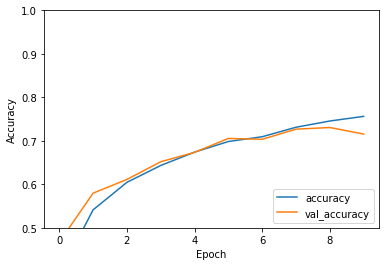

In [65]:
plt.plot(log.history['accuracy'], label='accuracy')
plt.plot(log.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test1, Y_test, verbose=2)

| CNN  | Architecture | Acc. train % | Acc. test % |
| :------------- | :------------- | - | - |
| 1  | Layer 1: CONV D=32, w=h=3 <br>Layer 2: CONV D=32, w=h=6 <br>Layer 3: MAXPOOL size=2 <br>Layer 4: CONV D=32, w=h=3 <br>Layer 5: DENSE relu <br>Layer 6: DENSE softmax | 0.6503 | 0.6153 |
| 2  | Layer 1: CONV D=32, w=h=3 <br>Layer 2: MAXPOOL size=2 <br>Layer 3: CONV D=64, w=h=3 <br>Layer 4: MAXPOOL size=2 <br>Layer 5: CONV D=64, w=h=3 <br>Layer 6: DENSE relu <br>Layer 7: DENSE softmax  | 0.6861 | 0.6626 |
| 3  | Layer 1: CONV D=32, w=h=3 <br>Layer 2: MAXPOOL size=2 <br>Layer 3: DROPOUT 0.5 <br>Layer 4: CONV D=64, w=h=3 <br>Layer 5: MAXPOOL size=2 <br>Layer 6: CONV D=64, w=h=3 <br>Layer 7: DENSE relu <br>Layer 8: DENSE softmax  | 0.6432 | 0.6459 |
| 4  | Layer 1: CONV D=32, w=h=3 <br>Layer 2: MAXPOOL size=2 <br>Layer 3: CONV D=64, w=h=3 <br>Layer 4: MAXPOOL size=2 <br>Layer 5: CONV D=64, w=h=3 <br>Layer 6: DROPOUT 0.3 <br>Layer 7: DENSE softmax  | 0.6630 | 0.6740 |
| 4  | Layer 1: CONV D=32, w=h=3 <br>Layer 2: MAXPOOL size=2 <br>Layer 3: CONV D=64, w=h=3 <br>Layer 4: MAXPOOL size=2 <br>Layer 5: CONV D=128, w=h=3 <br>Layer 6: DROPOUT 0.3 <br>Layer 7: DENSE softmax  | 0.6972 | 0.6925 |
| 5  | Layer 1: CONV D=64, w=h=3 <br>Layer 2: MAXPOOL size=2 <br>Layer 3: CONV D=128, w=h=3 <br>Layer 4: MAXPOOL size=2 <br>Layer 5: CONV D=256, w=h=3 <br>Layer 6: DROPOUT 0.3 <br>Layer 7: DENSE softmax  | 0.7562 | 0.7156 |

Seems like CNN 2 had the best performance.